# Importing Section

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Data Collection

In [2]:
key="93f5e1b69f385b968e79168869023d3f2b7ac184"
#df = pdr.get_data_tiingo('AAPL', api_key=key)
#df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-08 00:00:00+00:00,108.66,109.77,108.17,108.91,23581740,25.262009,25.520069,25.148090,25.320130,94326960,0.0,1.0
1,AAPL,2016-04-11 00:00:00+00:00,109.02,110.61,108.83,108.97,29407518,25.345704,25.715358,25.301531,25.334080,117630072,0.0,1.0
2,AAPL,2016-04-12 00:00:00+00:00,110.44,110.50,108.66,109.34,27232325,25.675835,25.689784,25.262009,25.420100,108929300,0.0,1.0
3,AAPL,2016-04-13 00:00:00+00:00,112.04,112.34,110.80,110.80,33257316,26.047814,26.117560,25.759530,25.759530,133029264,0.0,1.0
4,AAPL,2016-04-14 00:00:00+00:00,112.10,112.39,111.33,111.62,25473923,26.061763,26.129184,25.882748,25.950169,101895692,0.0,1.0


In [3]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-03-30 00:00:00+00:00,119.90,120.4031,118.86,120.11,85671919,119.90,120.4031,118.86,120.11,85671919,0.0,1.0
1253,AAPL,2021-03-31 00:00:00+00:00,122.15,123.5200,121.15,121.65,118323826,122.15,123.5200,121.15,121.65,118323826,0.0,1.0
1254,AAPL,2021-04-01 00:00:00+00:00,123.00,124.1800,122.49,123.66,75089134,123.00,124.1800,122.49,123.66,75089134,0.0,1.0
1255,AAPL,2021-04-05 00:00:00+00:00,125.90,126.1601,123.07,123.87,88651175,125.90,126.1601,123.07,123.87,88651175,0.0,1.0
1256,AAPL,2021-04-06 00:00:00+00:00,126.21,127.1300,125.65,126.50,80171253,126.21,127.1300,125.65,126.50,80171253,0.0,1.0


In [4]:
df1=df['close']

In [5]:
df1

0       108.66
1       109.02
2       110.44
3       112.04
4       112.10
         ...  
1252    119.90
1253    122.15
1254    123.00
1255    125.90
1256    126.21
Name: close, Length: 1257, dtype: float64

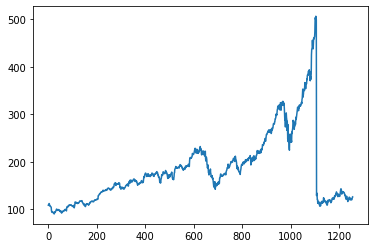

In [6]:
%matplotlib inline
plt.plot(df1)

# Data preprocessing

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.04406494],
       [0.04493085],
       [0.04834636],
       ...,
       [0.07855683],
       [0.08553217],
       [0.08627781]])

In [9]:
X_train, X_test = train_test_split(df1, test_size=0.33, random_state=42)

In [10]:
x_train_data =X_train

In [11]:
x_test_data = X_test

In [12]:
x_train_data.shape

(842, 1)

In [13]:
x_test_data.shape

(415, 1)

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(x_train_data, time_step)
X_test, y_test = create_dataset(x_test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(741, 100)
(741,)


(None, None)

In [19]:
X_train

array([[0.53156945, 0.10746843, 0.21224293, ..., 0.06354781, 0.06316296,
        0.05943476],
       [0.10746843, 0.21224293, 0.00757667, ..., 0.06316296, 0.05943476,
        0.03401082],
       [0.21224293, 0.00757667, 0.10010824, ..., 0.05943476, 0.03401082,
        0.31160553],
       ...,
       [0.62871918, 0.45585087, 0.23648827, ..., 0.17799158, 0.05253157,
        0.56043295],
       [0.45585087, 0.23648827, 0.07126879, ..., 0.05253157, 0.56043295,
        0.88923632],
       [0.23648827, 0.07126879, 0.06525556, ..., 0.56043295, 0.88923632,
        0.05455201]])

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 150ms/step - loss: 0.0585 - val_loss: 0.0268
Epoch 2/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0323 - val_loss: 0.0267
Epoch 3/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0369 - val_loss: 0.0270
Epoch 4/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0355 - val_loss: 0.0265
Epoch 5/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0341 - val_loss: 0.0265
Epoch 6/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0349 - val_loss: 0.0264
Epoch 7/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0307 - val_loss: 0.0264
Epoch 8/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0339 - val_loss: 0.0264
Epoch 9/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0312 - val_loss: 0.0264
Epoch 10/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0362 - val_loss:

12/12 [==============================] - 1s 104ms/step - loss: 0.0349 - val_loss: 0.0288
Epoch 83/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0353 - val_loss: 0.0335
Epoch 84/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0304 - val_loss: 0.0290
Epoch 85/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0319 - val_loss: 0.0275
Epoch 86/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0330 - val_loss: 0.0342
Epoch 87/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0353 - val_loss: 0.0311
Epoch 88/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0314 - val_loss: 0.0289
Epoch 89/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0378 - val_loss: 0.0316
Epoch 90/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0305 - val_loss: 0.0313
Epoch 91/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0295 - val_loss: 0.029

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

181.89890750411587

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

180.38754019977316

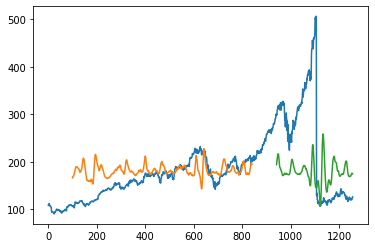

In [33]:

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()